# INFO 2950 Final Project - Phase II

## Research Questions:

Question: What factors influence the likelihood of UFO sightings across various countries. Here, we considered year, hallucenogenic drug use, education, wealth, access to internet, and religion.



## Data Descriptions:

For this phase, we began by collecting eleven data sets across our six factors, as well as one for UFO sightings. While year is a factor in our analysis, we chose to group our data on year, and so it is not a factor we outline below because we collected no data sets on it specifically. We outline them below:

**Factor One: Drug Use**

We scraped five data sets on drug use from the publically released National Survey on Drug Use and Health, one for each of the following years: 2021, 2019-2020, 2017-2018, 2015-2016, and 2013-2014. There was no published data for 2022. The information for data sets between 2017-2021 was only able to be downloaded in HTM or PDF format from the website. So, we downloaded the files locally as HTM, then re-saved them as HTML. Years 2013-2016 had to be manually inputted, as there was no format accesible (within the realm of this class) to scrape. The data sets contained information for ages 12+, and for each illicit drug type showed use for lifetime, past year, and past month.

Source for 2013-2014: https://www.samhsa.gov/data/report/results-2014-national-survey-drug-use-and-h

Source for 2015-2016: https://www.samhsa.gov/data/report/results-2016-national-survey-drug-use-and-health-detailed-tables

Source for 2017-2018: https://www.samhsa.gov/data/report/2018-nsduh-detailed-tables

Source for 2019-2020: https://www.samhsa.gov/data/report/2019-nsduh-detailed-tables

Source for 2021: https://www.samhsa.gov/data/report/2021-nsduh-detailed-tables 


**Factor Two: Education**

We used originally collected two data sets on education. One used preset standards to measure most educated countries by school level (tertiary to upper secondary) per country. We ended up not using this data set since it contained a limited number of countries and only had public data from 2021. The second dataset measured how many years of schooling, on average, every country had from 1870-2017; this one we did use. This data set was sorted by country, alpha-3 country code, year, and average years of schooling.

Source for school level: https://worldpopulationreview.com/country-rankings/most-educated-countries 

Source for years of schooling: https://www.kaggle.com/datasets/fredericksalazar/average-years-of-schooling-since-1870-2017

**Factor Three: Wealth**

When creating this data set, some resources that helped were
Discussion 3, Discussion 8, and https://medium.com/@kudlamolka/
scrap-data-from-wikipedia-table-to-csv-file-using-python-b5af7a6c858f. 


The data was listed by country label, esssentially already as a presentable table. It contained columns:

Region: What continent the country is in

2022 rank: The rank of the country terms of its democracy index in 2022

Country: The country that is being analyzed

Regime Type: The type of regime in terms of Full democracies, Flawed democracies, Hybrid regimes, Authoritarian regimes, and No data (as stated above)
- 2022: Democracy Index measured in 2022

- 2021: Democracy Index measured in 2021

- 2020: Democracy Index measured in 2020

- 2019: Democracy Index measured in 2019

- 2018: Democracy Index measured in 2018

- 2017: Democracy Index measured in 2017

- 2016: Democracy Index measured in 2016
- 2015: Democracy Index measured in 2015
- 2014: Democracy Index measured in 2014
- 2013: Democracy Index measured in 2013
- 2012: Democracy Index measured in 2012
- 2011: Democracy Index measured in 2011
- 2010: Democracy Index measured in 2010
- 2008: Democracy Index measured in 2008
- 2006: Democracy Index measured in 2006

We also scraped from the following: https://en.wikipedia.org/wiki/List_of_countries_by_total_wealth and because the table "Shares of global wealth(%) of the ten wealthiest countries by net national wealth for: 2000-2009, 2010-2019, 2020-2022" had the most continuous information starting from 2000 in comparison to the other tables presented. They also had the most interpretable data. The columns in the presented data table are:

- Year: The year the global wealth % occured
- Australia: The total net national wealth of Australia during the year matching this row
- Canada: The total net national wealth of the Canada during the year matching this row
- China: The total net national wealth of China during the year matching this row
- France: The total net national wealth of France during the year matching this row
- Germany: The total net national wealth of Germany during the year matching this row
- India: The total net national wealth of India during the year matching this row
- Italy: The total net national wealth of the Italy during the year matching this row
- Japan: The total net national wealth of Japan during the year matching this row
- South Korea: The total net national wealth of  South Korea during the year matching this row
- Spain: The total net national wealth of Spain during the year matching this row
- United Kingdom: The total net national wealth of the UK during the year matching this row
- United States: The total net national wealth of the US during the year matching this row
- Aggregate share of the top 10: The total net national wealth of the top 10 during the year matching this row

This first table is for years 2000-2010

Source Democracy Index: https://en.m.wikipedia.org/wiki/The_Economist_Democracy_Index 
Source Total Wealth: https://en.wikipedia.org/wiki/List_of_countries_by_total_wealth 

**Factor Four: Internet Access**

This data is from the world bank and spans the years 1989 (1960 until then are NaNs) to 2022, and gives data per year for each country of the percent of the country that has internet access. This data is being used as an indicator of access to technology.

Source for global internet access data frame: https://data.worldbank.org/indicator/IT.NET.USER.ZS?end=2022&most_recent_value_desc=true&start=1960

**Factor Five: Religion**

This data was sourced from kaggle and contains data on the number of religious followers for different countries over time (1945-2010). The columns give each religions followers for the country and date, as well as the percents of each religion, and some stats for different combinations of religion types.

Source for Global Religions DataFrame 1945-2010: kaggle.com/datasets/umichigan/world-religions/?select=national.csv 

**UFO Sightings** 

We originally collected a data set from Kaggle containing over 80,000 UFO sightings. It measured datetime, city, state, country, shape, duration in seconds and hours, comments, date posted, lattitude, and longitude. However, upon closer inspection, we realized this data only had entries for five countries (United States, Germany, Australia, Great Britan, and Canada). So, we researched to find a more inclusive data set. 

Source UFO sightings kaggle: https://www.kaggle.com/datasets/NUFORC/ufo-sightings?select=scrubbed.csv 


In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
import duckdb

## Data Cleaning (Education):

The original income data sheet came in csv format. So, all we had to do to clean the data was pull the columns we needed. We scraped the country and most educated total columns by year, not gender (MostEducatedCountriesTertiaryTotal2021, MostEducatedCountriesBelowUpperSecondaryTotal2021, MostEducatedCountriesUpperSecondaryTotal2021). This is all we had to do to clean this data. For the reasons stated in the data descriptions sections, we didn't end up using this data later. 

In [2]:
education_df = pd.read_csv("most-educated-countries-2023.csv")

education_df = duckdb.sql("SELECT country, \
        MostEducatedCountriesTertiaryTotal2021, \
        MostEducatedCountriesBelowUpperSecondaryTotal2021, \
        MostEducatedCountriesUpperSecondaryTotal2021, \
        FROM education_df").df()
education_df.head()

,country,MostEducatedCountriesTertiaryTotal2021,MostEducatedCountriesBelowUpperSecondaryTotal2021,MostEducatedCountriesUpperSecondaryTotal2021
0,South Korea,69,2.0,29
1,Canada,66,5.0,29
2,Japan,65,NaN,18
3,Ireland,63,5.0,32
4,Luxembourg,63,10.0,27


This data came originally as a Numbers file. When saved as a CSV, we then had to split the columns by ";".

In [3]:
schooling_years_df = pd.read_csv("schooling_years.csv", delimiter=";")
schooling_years_df.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


Then, since the file was so large, we pulled just the information for the United States as an example of what applicable data from this data frame would look like. We renamed the avg_years_of_schooling column to Years_of_Schooling_AVG for readability. 

In [4]:
us_data_df = duckdb.sql("SELECT Entity, Year, avg_years_of_schooling\
                    FROM schooling_years_df \
                    WHERE Entity = 'United States'").df()
us_data_df = us_data_df.rename(columns={"avg_years_of_schooling": 
                                        "Years_of_Schooling_AVG"})

us_data_df.head()

,Entity,Year,Years_of_Schooling_AVG
0,United States,1870,3.70
1,United States,1875,4.09
2,United States,1880,4.49
3,United States,1885,4.85
4,United States,1890,5.45


To follow our United States example, we graphed Average Years of Schooling vs. Year as a linegraph. This helps visualize the data, but was not explicitly used in our final analysis. 

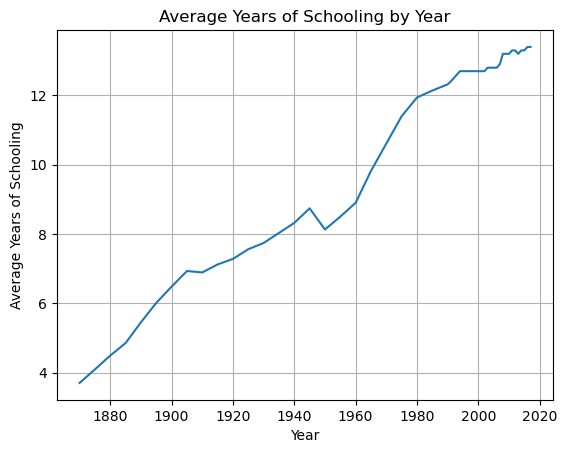

In [5]:
plt.plot(us_data_df["Year"], us_data_df["Years_of_Schooling_AVG"])
plt.xlabel('Year')
plt.ylabel('Average Years of Schooling')
plt.title('Average Years of Schooling by Year')
plt.grid(True)

## Data Cleaning (UFO Sightings):
This data was originally a csv file, and we kept it that way. From Kaggle, we chose to take the data that was already scrubbed, which accounted for missing cells with NaN values. 

In [6]:
## load in scrubbed data 
scrubbed_location_df = pd.read_csv("scrubbed.csv") 
scrubbed_location_df.head()

/var/folders/n8/5lk2zknn785fwp1_wzpmgts80000gn/T/ipykernel_70230/2958099957.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  scrubbed_location_df = pd.read_csv("scrubbed.csv")


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


Then, we just pulled the datetime and country from this data set. 

In [7]:
## getting just time and country data
scrubbed_location_df = duckdb.sql("SELECT datetime, country FROM\
                                scrubbed_location_df").df()
scrubbed_location_df.head()

,datetime,country
0,10/10/1949 20:30,us
1,10/10/1949 21:00,NaN
2,10/10/1955 17:00,gb
3,10/10/1956 21:00,us
4,10/10/1960 20:00,us


Create new df of countries and their counts, sorted in descending order.

In [10]:
## making df of countries and ufo count, sorted in descending order 
## crosstab = 
count_df = pd.crosstab(index=scrubbed_location_df['country'], 
                       columns='count').sort_values('count', 
                        ascending=False)
count_df.head()

col_0,count
country,
us,65114
ca,3000
gb,1905
au,538
de,105


Then, in order to graph the data, we converted datetime to regular. This adjust_time function is from the original Kaggle link on this data set. The use of the function is original. We then used groupby to count the number of sightings per year. Then, we graphed the Year vs. Number of Sightings as a linegraph, adjusting the figure size as needed to make data easier to view.

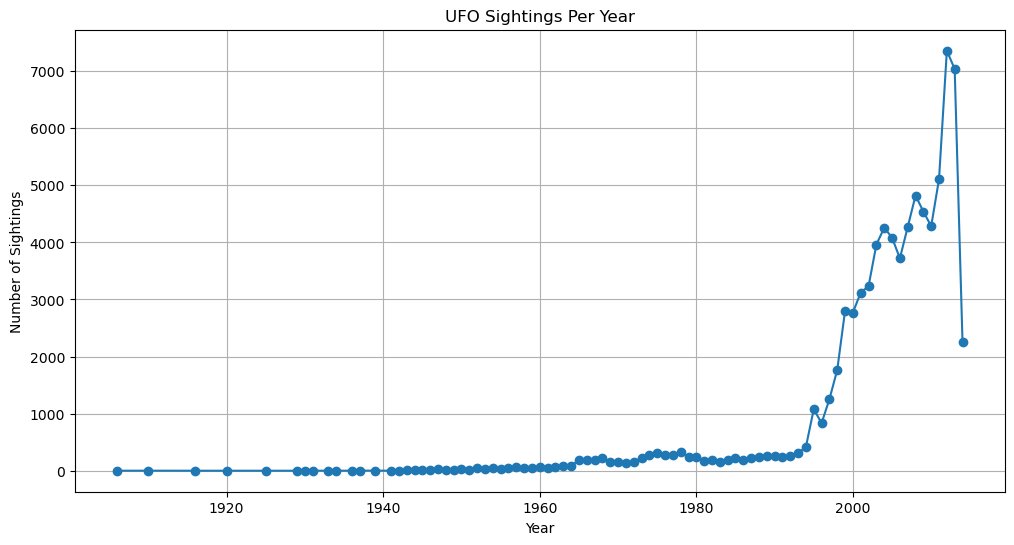

In [11]:
## adjusting times from datetime
def adjust_time(time_str):
    if "24:00" in time_str:
        time_str = time_str.replace("24:00", "00:00")
    return time_str

## adjust time
scrubbed_location_df['datetime'] = \
                    scrubbed_location_df['datetime'].apply(adjust_time)

## finish time formatting by subtracting year 
scrubbed_location_df['year'] = pd.to_datetime(scrubbed_location_df['datetime'], 
                                              format='%m/%d/%Y %H:%M').dt.year

## groupby year, and num of sightings
yearly_counts = scrubbed_location_df.groupby('year').size()

## create lineplot 
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, 
         marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings Per Year')
plt.grid(True)


## Data Cleaning (Drug Use):

The data came in html format. Then, we read them using pd.read_html to access the files. This resulted in a list of dataframes. Since we only need to first data set, we sliced our input at the zeroth index and saved this to a new dataframe for each file. 

In [13]:
## loading in data for years 2017-2021
## html inputs as list of dfs, we only want the first one
drug_2021 = pd.read_html("drug_2021_stats.html")
stats_2021_df = drug_2021[0]

drug_2020 = pd.read_html("drug_2020_2019_stats.html")
stats_2020_df = drug_2020[0]

drug_2019 = pd.read_html("drug_2020_2019_stats.html")
stats_2019_df = drug_2019[0]

drug_2018 = pd.read_html("drug_2018_2017_stats.html")
stats_2018_df = drug_2018[0]

drug_2017 = pd.read_html("drug_2018_2017_stats.html")
stats_2017_df = drug_2017[0]

We then combined these dataframes on Drug using a left join. Then, we filtered the new data set to only include the Past Year and Drug columns. After, we renamed the Year columns to be more readable, and manually inputted the required years. Finally, we melted the dataframe to make it long instead of wide and got rid of the drug column, as it was unnecesary since all data was based on the same drug. Then, we reordered the Years to account for changes made by manual adding. 

In [14]:
## getting data by joining on Drug column
combined_df = stats_2018_df.join(stats_2019_df.set_index('Drug'), 
                                 on='Drug', how='left', lsuffix='2017', 
                                 rsuffix='2018')

combined_df = combined_df.join(stats_2021_df.set_index('Drug'), 
                               on='Drug', how='left', rsuffix='2019')

combined_df = combined_df.filter(regex='Past Year|Drug', axis=1)

## getting data for only hallucinogenic drugs 
hal_df = combined_df[combined_df['Drug'] == "Hallucinogens"]
hal_df = hal_df.rename(columns = {'Past Year (2017)': '2017', 
                                   'Past Year (2018)': '2018',
                                   'Past Year (2019)': '2019',
                                   'Past Year (2020)': '2020',
                                   'Past Year (2021)': '2021'})

## manually inputing years 2013-2016 
hal_df['2016'] = 4903
hal_df['2015'] = 4692
hal_df['2014'] = 4250
hal_df['2013'] = 4430

## melting wide to long, renaming columns 
hal_df = pd.melt(hal_df, id_vars=['Drug'], var_name='Year', 
                 value_name='Number of Users (Thousands)')

## getting rid of drug category because its unecessary  
hal_df = hal_df[['Year', 'Number of Users (Thousands)']]

## since years go from 2021-2017 then 2016-2013, we sort by 
## years ascending, then reset the index 
hal_df = hal_df.sort_values(by='Year', ascending=True)
hal_df = hal_df.reset_index(drop=True)

## display 
hal_df

,Year,Number of Users (Thousands)
0,2013,4430
1,2014,4250
2,2015,4692
3,2016,4903
4,2017,5125
5,2018,5595
6,2019,6010
7,2020,7133
8,2021,7406


In order to graph the data, we change the data type of the Year and Number of User columns. This was just done to fix the error message. Then, we drew a line graph of Halluciongen Users vs. Numbers for visual analysis. 

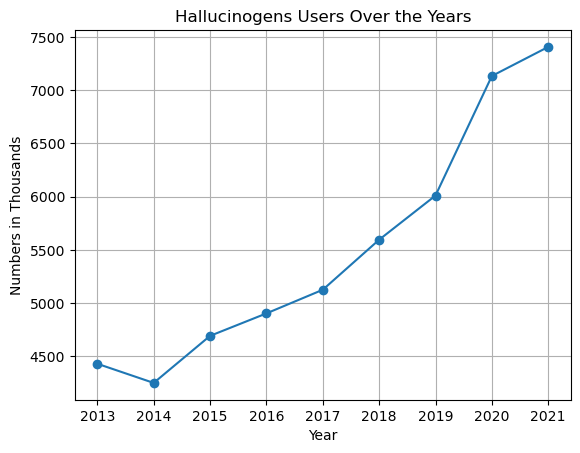

In [15]:
## convert years to strings and numbers as number values to prevent errors
## when graphing 
hal_df['Year'] = hal_df['Year'].astype(str)
hal_df['Number of Users (Thousands)'] = pd.to_numeric(
                                    hal_df['Number of Users (Thousands)'], 
                                    errors='coerce')

## line graph of user number vs year 
plt.plot(hal_df["Year"], hal_df["Number of Users (Thousands)"], "o", 
         linestyle='-')
plt.xlabel('Year')
plt.ylabel('Numbers in Thousands')
plt.title('Hallucinogens Users Over the Years')
plt.grid(True);

## Data Cleaning (Internet Access):

This data was originally a csv file. First we read it in. 

In [16]:
internet_df = pd.read_csv('internet_access_by_country 1989-2022.csv', 
                          thousands=",")
internet_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.237716,14.485849,15.753330,17.310987,20.063024,22.589591,24.988401,27.660654,NaN,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.923441,18.109485,22.869750,27.081219,32.089337,35.276448,41.749819,46.990497,NaN,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.400000,22.000000,23.200000,26.000000,29.000000,32.129392,32.550147,32.602302,NaN,NaN


The final Column, indicator name, and indicator code were uneeded for our research. We kept both of the country columns since we will likely use country code, but the names will be helpful for reference. Because we are joining the data on year and country, we wanted a year column, and to get that needed a vertical data frame.
We used pd.melt to put all of the years into the the "year" column, and thier corresponding internet access percentage into the "internet access" column. We chose to keep NaN's because when joining the data frames together into a master it would be helpful to see which country-time mixes have full breadth of data

In [17]:
internet_df = internet_df.drop(['Unnamed: 67', 'Indicator Name', 'Indicator Code'], 
                               axis=1)
internet_df.head()   

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.126945,12.237716,14.485849,15.753330,17.310987,20.063024,22.589591,24.988401,27.660654,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.577756,14.923441,18.109485,22.869750,27.081219,32.089337,35.276448,41.749819,46.990497,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.129392,32.550147,32.602302,NaN


In [18]:
years_int = []
for year in range(1960, 2023):
    years_int.append(year)
years_str = [str(year) for year in years_int]
print(years_str)
internet_df_melt = pd.melt(internet_df, id_vars=['Country Name','Country Code'], 
                           value_vars=years_str, var_name = 'year', 
                           value_name = 'internet access')
internet_df_melt.head()

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


,Country Name,Country Code,year,internet access
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,NaN
2,Afghanistan,AFG,1960,NaN
3,Africa Western and Central,AFW,1960,NaN
4,Angola,AGO,1960,NaN


## Data Cleaning (Religion):

The data set originally had only rounded years up to 2010, so the sightings data will need a new column that shows the rounded year so religion can be matched to it. So, first we read in the csv file.

In [19]:
religions_df = pd.read_csv('religions_by_country_1945-2010.csv', thousands=",")
religions_df.head()

,year,state,code,christianity_protestant,christianity_romancatholic,christianity_easternorthodox,christianity_anglican,christianity_other,christianity_all,judaism_orthodox,...,jainism_percent,confucianism_percent,syncretism_percent,animism_percent,noreligion_percent,otherreligion_percent,religion_sumpercent,total_percent,dual_religion,source_code
0,1945,United States of America,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,...,0.0,0.0,0.0,0.0,0.1635,0.0039,0.9961,1.0000,0,13
1,1950,United States of America,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,...,0.0,0.0,0.0,0.0,0.1482,0.0041,0.9959,1.0000,0,18
2,1955,United States of America,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,...,0.0,0.0,0.0,0.0,0.1404,0.0193,0.9807,0.9999,0,15
3,1960,United States of America,USA,90692928,50587880,3334535,2710065,2908939,150234347,973500,...,0.0,0.0,0.0,0.0,0.1193,0.0076,0.9924,0.9999,0,13
4,1965,United States of America,USA,94165803,64761783,4792868,2822149,973155,167515758,991200,...,0.0,0.0,0.0,0.0,0.1020,0.0030,0.9970,1.0001,0,20


Then for each year-country pair, we looked through all of the non "all" religions. We chose not to do the all religions because they combine data from multiple others. Of all of the individual religions, the greatest population count per country was found and put into a new column called top_religion. We then changed the year column to rounded year so when this data joins to the other data frames it can map other years to the closest multiple of 5 year

In [20]:
religions = []

for i in range(len(religions_df.columns)):
    column_name = religions_df.columns[i]
    
    if column_name in ['year', 'state', 'code']:
        continue
    if (religions_df[column_name].dtype == float):
        religions_df[column_name]=pd.to_numeric(religions_df[column_name], 
                                downcast='integer')
    religions.append(religions_df[column_name])
    
    if column_name == 'religion_all':
        break
        
i = 0
eachrow = 0
topreligion = []
max_index = 0

#goes through all of the rows
for eachrow in range(religions_df.shape[0]): 
    valuelist = []
    
    #checks each religion
    for i in range(len(religions)): 
        #indexes the value of the religion in question
        value = religions_df.iloc[eachrow, 3+i] 
        valuelist.append(value)
        if ("all" in religions_df.columns[3+i]):
            valuelist[-1] = 0
    max_index = valuelist.index(max(valuelist))
    topreligion.append(religions_df.columns[3+ max_index])
    
top_df = religions_df[['year', 'code']]
top_df['topReligion'] = topreligion
top_df = top_df.rename(columns={'year': 'rounded year'})
top_df.head(100)

/var/folders/n8/5lk2zknn785fwp1_wzpmgts80000gn/T/ipykernel_70230/4136306345.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['topReligion'] = topreligion


,rounded year,code,topReligion
0,1945,USA,christianity_protestant
1,1950,USA,christianity_protestant
2,1955,USA,christianity_protestant
3,1960,USA,christianity_protestant
4,1965,USA,christianity_protestant
...,...,...,...
95,1990,TRI,christianity_romancatholic
96,1995,TRI,christianity_romancatholic
97,2000,TRI,christianity_romancatholic
98,2005,TRI,christianity_romancatholic


Then, we only took the code column, since that is the other column that is going to be joined on

In [21]:
print(top_df['topReligion'].unique())
top_df['code'].unique()

['christianity_protestant' 'christianity_romancatholic'
 'christianity_anglican' 'islam_other' 'islam_sunni'
 'christianity_easternorthodox' 'islam_shi’a' 'christianity_other'
 'judaism_orthodox' 'islam_ibadhi' 'buddhism_other' 'buddhism_mahayana'
 'buddhism_theravada']


array(['USA', 'CAN', 'BHM', 'CUB', 'HAI', 'DOM', 'JAM', 'TRI', 'BAR',
       'DMA', 'GRN', 'SLU', 'SVG', 'AAB', 'SKN', 'MEX', 'BLZ', 'GUA',
       'HON', 'SAL', 'NIC', 'COS', 'PAN', 'COL', 'VEN', 'GUY', 'SUR',
       'ECU', 'PER', 'BRA', 'BOL', 'PAR', 'CHL', 'ARG', 'URU', 'UKG',
       'IRE', 'NTH', 'BEL', 'LUX', 'FRN', 'MNC', 'LIE', 'SWZ', 'SPN',
       'AND', 'POR', 'GMY', 'GFR', 'GDR', 'POL', 'AUS', 'HUN', 'CZE',
       'CZR', 'SLO', 'ITA', 'SNM', 'MLT', 'ALB', 'MNG', 'MAC', 'CRO',
       'YUG', 'BOS', 'KOS', 'SLV', 'GRC', 'CYP', 'BUL', 'MLD', 'ROM',
       'RUS', 'EST', 'LAT', 'LIT', 'UKR', 'BLR', 'ARM', 'GRG', 'AZE',
       'FIN', 'SWD', 'NOR', 'DEN', 'ICE', 'CAP', 'STP', 'GNB', 'EQG',
       'GAM', 'MLI', 'SEN', 'BEN', 'MAA', 'NIR', 'CDI', 'GUI', 'BFO',
       'LBR', 'SIE', 'GHA', 'TOG', 'CAO', 'NIG', 'GAB', 'CEN', 'CHA',
       'CON', 'DRC', 'UGA', 'KEN', 'TAZ', 'BUI', 'RWA', 'SOM', 'DJI',
       'ETH', 'ERI', 'ANG', 'MZM', 'ZAM', 'ZIM', 'MAW', 'SAF', 'NAM',
       'LES', 'BOT',

## Data Cleaning (Religion):

The original data set contained data of each selected country's democracy index, measuring Full democracies as 10-8.01, Flawed democracies as 8-6.01, Hybrid regimes from 6-4.01, Authoritarian regimes from 4-0, and No data as excluded countries. 

The code essentially runs through the steps from Discussion 3, by making sure its the right requests.get, then turns the file into text, then into html

In [22]:
wiki_democracy_url = "https://en.m.wikipedia.org/wiki/The_Economist_Democracy_Index"


wiki_democracy_result = requests.get(wiki_democracy_url)


if wiki_democracy_result.status_code != 200:
    print("something went wrong:", wiki_democracy_result)
    
wiki_democracy_text = wiki_democracy_result.text

wiki_democracy_html = BeautifulSoup(wiki_democracy_text, "html.parser")


country_democracy_list = wiki_democracy_html.find_all('table',
attrs={'class':"wikitable sortable",
'style':"text-align:center;"})


country_democracy_df = pd.read_html(str(country_democracy_list))[1]

country_democracy_df.head()

,Region,2022 rank,Country,Regime type,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
0,North America,12,Canada,Full democracy,8.88,8.87,9.24,9.22,9.15,9.15,9.15,9.08,9.08,9.08,9.08,9.08,9.08,9.07,9.07
1,North America,30,United States,Flawed democracy,7.85,7.85,7.92,7.96,7.96,7.98,7.98,8.05,8.11,8.11,8.11,8.11,8.18,8.22,8.22
2,Western Europe,20,Austria,Full democracy,8.20,8.07,8.16,8.29,8.29,8.42,8.41,8.54,8.54,8.48,8.62,8.49,8.49,8.49,8.69
3,Western Europe,36,Belgium,Flawed democracy,7.64,7.51,7.51,7.64,7.78,7.78,7.77,7.93,7.93,8.05,8.05,8.05,8.05,8.16,8.15
4,Western Europe,37,Cyprus,Flawed democracy,7.38,7.43,7.56,7.59,7.59,7.59,7.65,7.53,7.40,7.29,7.29,7.29,7.29,7.70,7.60


In this step, we took the labels of the columns that were not in variable form, and turned them into variables that would be easier to type when reffering to them.

In [23]:
country_democracy_df = country_democracy_df.rename(columns = {"Regime type":"Regime_Type",
"2022 rank":"2022_Rank"})

country_democracy_df.head()

,Region,2022_Rank,Country,Regime_Type,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2008,2006
0,North America,12,Canada,Full democracy,8.88,8.87,9.24,9.22,9.15,9.15,9.15,9.08,9.08,9.08,9.08,9.08,9.08,9.07,9.07
1,North America,30,United States,Flawed democracy,7.85,7.85,7.92,7.96,7.96,7.98,7.98,8.05,8.11,8.11,8.11,8.11,8.18,8.22,8.22
2,Western Europe,20,Austria,Full democracy,8.20,8.07,8.16,8.29,8.29,8.42,8.41,8.54,8.54,8.48,8.62,8.49,8.49,8.49,8.69
3,Western Europe,36,Belgium,Flawed democracy,7.64,7.51,7.51,7.64,7.78,7.78,7.77,7.93,7.93,8.05,8.05,8.05,8.05,8.16,8.15
4,Western Europe,37,Cyprus,Flawed democracy,7.38,7.43,7.56,7.59,7.59,7.59,7.65,7.53,7.40,7.29,7.29,7.29,7.29,7.70,7.60


In this step, we took all of the year columns and turned them into one large year column in order to more easily merge the data together. This way, we can keep the democracy index values while also puting it aside the other values in the same year.

In [24]:
country_democracy_df = country_democracy_df.melt(id_vars = ["Region","2022_Rank","Country","Regime_Type"],
value_vars = ["2022","2021","2020","2019","2018","2017","2016","2015","2014",
"2013","2012","2011","2010"], var_name = "Year", value_name = "Democracy_Index")
country_democracy_df

,Region,2022_Rank,Country,Regime_Type,Year,Democracy_Index
0,North America,12,Canada,Full democracy,2022,8.88
1,North America,30,United States,Flawed democracy,2022,7.85
2,Western Europe,20,Austria,Full democracy,2022,8.20
3,Western Europe,36,Belgium,Flawed democracy,2022,7.64
4,Western Europe,37,Cyprus,Flawed democracy,2022,7.38
...,...,...,...,...,...,...
2166,Sub-Saharan Africa,92,Tanzania,Hybrid regime,2010,5.64
2167,Sub-Saharan Africa,130,Togo,Authoritarian,2010,3.45
2168,Sub-Saharan Africa,99,Uganda,Hybrid regime,2010,5.05
2169,Sub-Saharan Africa,78,Zambia,Hybrid regime,2010,5.68


We follow the same loading process as from the first Wikepedia article. 

In [25]:
wiki_wealth_url = "https://en.wikipedia.org/wiki/List_of_countries_by_total_wealth"

wiki_wealth_result = requests.get(wiki_wealth_url)

if wiki_wealth_result.status_code != 200:
    print("something went wrong:", wiki_wealth_result)
    
wiki_wealth_text = wiki_wealth_result.text

wiki_wealth_html = BeautifulSoup(wiki_wealth_text, "html.parser")

country_wealth_list = wiki_wealth_html.find_all('table',
attrs={'class':"wikitable sortable"})

country_wealth_df_0to9 = pd.read_html(str(country_wealth_list))[0]

country_wealth_df_0to9.head()

,Year,Australia,Canada,China,France,Germany,India,Italy,Japan,South Korea,Spain,United Kingdom,United States,Aggregate share of the top 10
0,2000,—,2.2%,3.1%,4.0%,5.2%,—,4.7%,16.5%,1.5%,2.1%,5.6%,36.9%,81.8%
1,2001,—,2.1%,3.6%,4.0%,5.2%,—,4.6%,14.1%,1.5%,2.3%,5.6%,38.8%,81.8%
2,2002,—,2.0%,3.7%,4.6%,5.5%,—,5.3%,13.8%,1.7%,2.9%,6.1%,35.1%,80.7%
3,2003,1.9%,2.2%,3.7%,5.2%,5.8%,—,5.7%,12.9%,—,3.5%,6.2%,32.8%,79.9%
4,2004,1.9%,2.2%,3.9%,5.6%,5.7%,—,5.7%,11.5%,—,3.9%,6.5%,32.5%,79.4%


This next one is for years 2010-2019

In [26]:
country_wealth_df_10to19 = pd.read_html(str(country_wealth_list))[1]

country_wealth_df_10to19.head()

,Year,Australia,Canada,China,France,Germany,India,Italy,Japan,South Korea,Spain,United Kingdom,United States,Aggregate share of the top 10
0,2010,—,2.7%,10.1%,5.4%,4.7%,2.7%,4.6%,11.4%,—,3.5%,4.4%,25.7%,75.2%
1,2011,—,2.7%,11.9%,5.1%,4.6%,2.5%,4.3%,11.4%,—,3.4%,4.5%,25.2%,75.6%
2,2012,—,2.8%,12.5%,4.8%,4.6%,2.7%,4.2%,9.8%,—,2.9%,4.4%,25.6%,74.3%
3,2013,—,2.7%,13.8%,4.8%,4.7%,2.6%,4.1%,7.8%,—,2.7%,4.5%,26.8%,74.5%
4,2014,2.2%,2.6%,15.1%,4.2%,4.3%,2.8%,3.9%,7.1%,—,—,4.7%,28.6%,75.5%


This next one takes 2020-2022

In [27]:
country_wealth_df_20to22 = pd.read_html(str(country_wealth_list))[2]

country_wealth_df_20to22.head()

,Year,Australia,Canada,China,France,Germany,India,Italy,Japan,South Korea,Spain,United Kingdom,United States,Aggregate share of the top 10
0,2020,—,2.5%,17.5%,3.9%,4.3%,3.0%,2.9%,6.3%,2.3%,—,3.7%,29.9%,76.3%
1,2021,2.3%,2.7%,18.5%,3.5%,4.0%,3.2%,2.5%,5.4%,—,—,3.6%,31.3%,77.0%
2,2022,—,2.5%,18.6%,3.5%,3.8%,3.4%,2.4%,5.0%,2.2%,—,3.5%,30.8%,75.7%


Now we appended all three to make one big data set from 2000-2022

In [28]:
combined1 = pd.concat([country_wealth_df_0to9, country_wealth_df_10to19], ignore_index=True)
combined = pd.concat([combined1,country_wealth_df_20to22],ignore_index=True)
combined.head()

,Year,Australia,Canada,China,France,Germany,India,Italy,Japan,South Korea,Spain,United Kingdom,United States,Aggregate share of the top 10
0,2000,—,2.2%,3.1%,4.0%,5.2%,—,4.7%,16.5%,1.5%,2.1%,5.6%,36.9%,81.8%
1,2001,—,2.1%,3.6%,4.0%,5.2%,—,4.6%,14.1%,1.5%,2.3%,5.6%,38.8%,81.8%
2,2002,—,2.0%,3.7%,4.6%,5.5%,—,5.3%,13.8%,1.7%,2.9%,6.1%,35.1%,80.7%
3,2003,1.9%,2.2%,3.7%,5.2%,5.8%,—,5.7%,12.9%,—,3.5%,6.2%,32.8%,79.9%
4,2004,1.9%,2.2%,3.9%,5.6%,5.7%,—,5.7%,11.5%,—,3.9%,6.5%,32.5%,79.4%


Lastly, we made a country column so we can compare the values easier using melt.

In [29]:
new_df = combined.melt(id_vars = ["Year"],
value_vars = ["Australia","Canada","China","France","Germany","India","Italy",
"Japan","South Korea","Spain","United Kingdom","United States"],
var_name = "Countries", value_name = "Wealth_share_percent")

new_df["Wealth_share_percent"]=new_df["Wealth_share_percent"].str.rstrip("%")
new_df = new_df.replace("—", np.nan, regex=True)
new_df["Wealth_share_percent"] = new_df["Wealth_share_percent"].astype(float)
new_df.head()

,Year,Countries,Wealth_share_percent
0,2000,Australia,NaN
1,2001,Australia,NaN
2,2002,Australia,NaN
3,2003,Australia,1.9
4,2004,Australia,1.9


## Data Cleaning (UFO Sightings):



In [35]:
import csv
url = "https://nuforc.org/subndx/?id=sChanging"


response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    data = []
    table = soup.find('table')  

    if table:
        rows = table.find_all('tr')
        for row in rows:
            columns = row.find_all('td')
            if columns:
                
                row_data = [column.get_text() for column in columns]
                data.append(row_data)


date = []
for i in range(100):
    date.append(data[i][1])

country = []
for i in range(100):
    country.append(data[i][4])

Alien_df = pd.DataFrame(
    {'Date': date,
     'Country': country,
    })
Alien_df.head()

,Date,Country
0,06/24/1996 00:30,USA
1,01/01/1997 07:00,USA
2,01/22/1997 03:35,USA
3,06/08/1994 22:30,USA
4,06/06/1997 03:00,Spain


## Data Descriptions Part II:

Essentially, we created dataframes for all of the values by Date, and are planning to combine them all once we sumbit our final version.

We have data frames for Wealth, Religion, Political Spectrum, Education, Hallucinagetics, and all of the alien data, with common column values being Date and Country. However, combining all of it for now seems impossible, especially since we are missing some of the values for our actual alien data set as it is hard to transfer/ needs some more time.

Most of the data for the Alien data is from the United States, which could also cause a skewness towards the USA showing more reports as we find more time and more resources.

## Difficulties faced during data collection:

Our biggest issue during data collection was finding data within the same range of years. Some of our data went all the way back to the 1600's, while other viable data only could be found within, for example, years 2013-2021. So, this made it hard to analyse the data meaningfully. 

Another issue was in unsimilar data types and unfamiliar file formats. For example, in our religion data set, the counts of different religions first seemed like they were all integers, but upon inspection a few of them were floats. While this wasn't hard to fix, it did take time to figure out which data entries needed fixing. We also ran into an issue with the HTM file. Upon trying to download it, it removed itself from the computer and didn't appear. Once we restarted the computer and downloaded the file to the desktop instead of into a folder, we were able to correctly save and convert it to HTML. 

## Limitations:

We ran into limitations in range of years, as mentioned in difficulties faced, where every data set we included had vastly different ranges of years. Cutting the data into a shared specific set of years would make it much smaller and result in less accurate predictions, but keeping to too large would make it hard to manage. 

## Questions:

1. How do we effectively decide how to measure our factors? As in, there are many different ways to measure education, for example. Is there a specific way, or any advice, to decide how we should be measuring such vast factors?